### Run the following chunk of code to import any libraries or packages necessary for running the rest of the code.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import os as os
import matplotlib.colors as colors

### Run the following code to plot the residue-residue forces for both the electrostatic force and the hydrophobic force. 
The following code will plot the residue-residue forces for both the electrostatic and hydrophobic forces. Note, the user will have to either change their directory structure to match that of the code, or change the code directory variables to match their directoy structure.

20_uM_Protein_0_mM_Salt_60_nm_Resize_4_x_phos_0.1985_Epsilon_1.77_Yukawa_Trajectory_E_Residue_Forces.npy
-16.006528908968995
20_uM_Protein_1000_mM_Salt_60_nm_Resize_4_x_phos_0.2037_Epsilon_1.77_Yukawa_Trajectory_E_Residue_Forces.npy
-19.772679774574538
20_uM_Protein_200_mM_Salt_60_nm_Resize_4_x_phos_0.19954_Epsilon_1.77_Yukawa_Trajectory_E_Residue_Forces.npy
-14.270142296400378


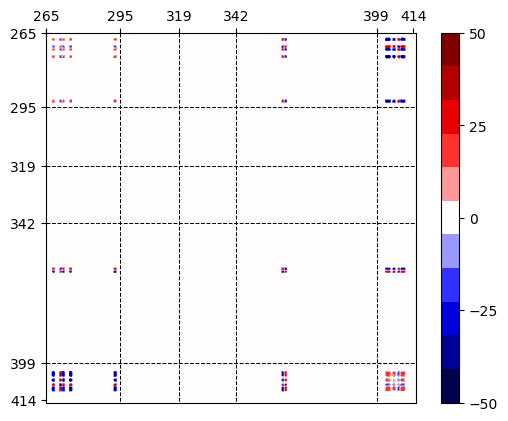

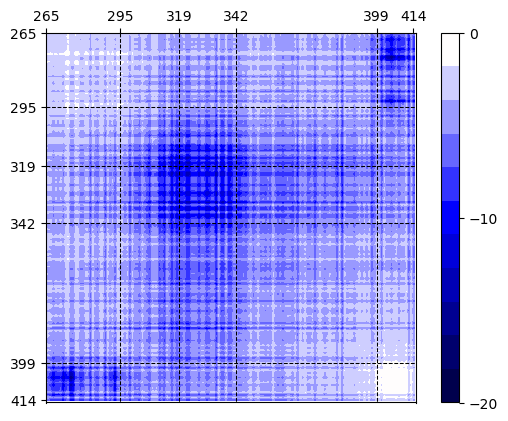

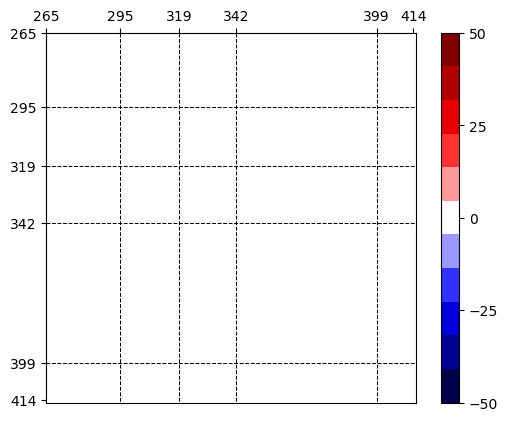

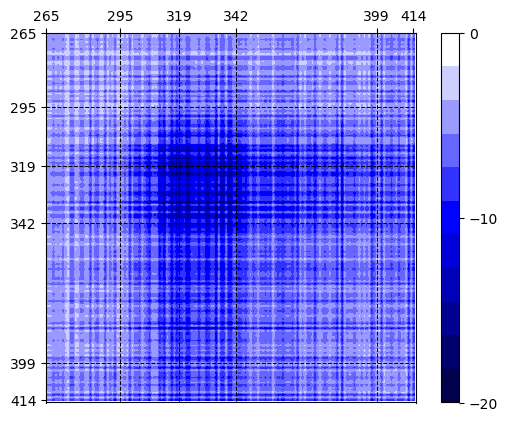

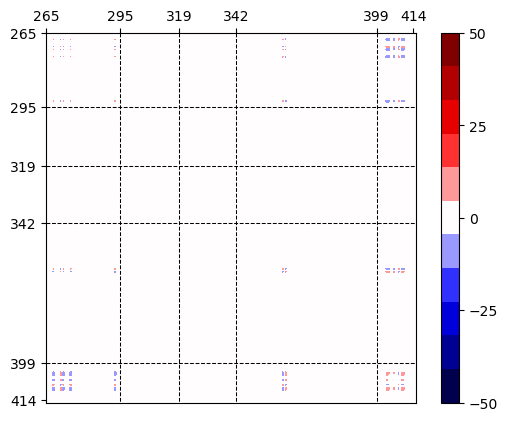

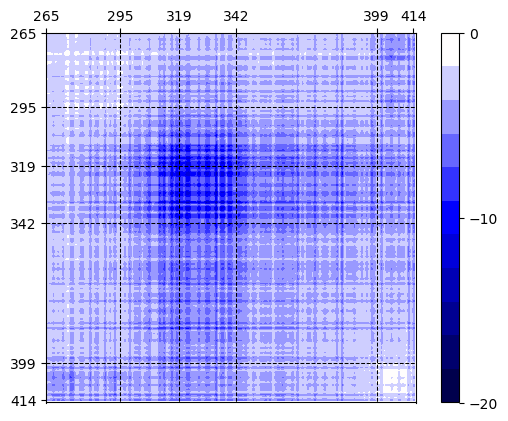

In [35]:
base_Directory = "C://Users/Brandon/Desktop/Research_Material/Molecular_Dynamics/TDP_43_Project/Analysis/Plot_Residue_Forces/"

phos = 4

input_Working_Directory_One = base_Directory + "Inputs/Electrostatic/" + str(phos) + "x_Phos/"
input_Working_Directory_Two = base_Directory + "Inputs/Hydrophobic/" + str(phos) + "x_Phos/"
output_Working_Directory = base_Directory + "Outputs/" + str(phos) + "x_Phos/"

phosphorylations = [0,2,4]

protein_Concentration = 20

salt_Concentrations = [0,200,1000]

force_Conversion_One = 1.661*10**(-12) #N Per kJ/(nm*mol)
force_Conversion_Two = 1*10**12 #pN Per N

def truncate_colormap(cmap, minval=0.0, maxval=1.0, n=100):
    new_cmap = colors.LinearSegmentedColormap.from_list(
        'trunc({n},{a:.2f},{b:.2f})'.format(n=cmap.name, a=minval, b=maxval),
        cmap(np.linspace(minval, maxval, n)))
    return new_cmap

cmap = plt.get_cmap('seismic')
new_cmap = truncate_colormap(cmap, 0, 0.5)


electrostatic_Forces = []

hydrophobic_Forces = []

for file in os.listdir(input_Working_Directory_One):
    print(file)
    electrostatic_Sums = np.load(input_Working_Directory_One + file)
    hydrophobic_Sums = np.load(input_Working_Directory_Two + file.replace("_E_","_H_"))

    electrostatic_Sums = np.copy(electrostatic_Sums)*force_Conversion_One*force_Conversion_Two
    hydrophobic_Sums = np.copy(hydrophobic_Sums)*force_Conversion_One*force_Conversion_Two
    
    salt_Concentration = int(re.split("Protein_|_mM", file)[1])
                
    fig, ax = plt.subplots()
    maximum = 50
    minimum = -50
    number_Of_Colors = 11
    plt.imshow(electrostatic_Sums, cmap = colors.ListedColormap(cmap(np.linspace(0,1,number_Of_Colors))), vmin = minimum, vmax = maximum)
    plt.colorbar(ticks = np.linspace(minimum,maximum,5))
    ax.tick_params(top=True, labeltop=True, bottom=False, labelbottom=False)
    plt.xticks([0,30,54,77,134,149])
    ax.set_xticklabels(["265","295","319","342","399","414"])
    plt.yticks([0,30,54,77,134,149])
    ax.set_yticklabels(["265","295","319","342","399","414"])
    plt.vlines([30,54,77,134],0,151, color = "black", ls = "--", linewidth = 0.75)
    plt.hlines([30,54,77,134],0,151, color = "black", ls = "--", linewidth = 0.75)
    plt.xlim(0,150)
    plt.ylim(150,0)
    plt.savefig(output_Working_Directory + str(salt_Concentration) + "_mM_Salt_Electrostatic_Forces.png")
    plt.savefig(output_Working_Directory + str(salt_Concentration) + "_mM_Salt_Electrostatic_Forces.svg")
    print(np.min(hydrophobic_Sums))
    
    fig, ax = plt.subplots()
    maximum = 0
    minimum = -20
    number_Of_Colors = 11
    plt.imshow(hydrophobic_Sums, cmap = colors.ListedColormap(new_cmap(np.linspace(0,1,number_Of_Colors))), vmin = minimum, vmax = maximum)
    plt.colorbar(ticks = [0,-10,-20])
    ax.tick_params(top=True, labeltop=True, bottom=False, labelbottom=False)
    plt.xticks([0,30,54,77,134,149])
    ax.set_xticklabels(["265","295","319","342","399","414"])
    plt.yticks([0,30,54,77,134,149])
    ax.set_yticklabels(["265","295","319","342","399","414"])
    plt.vlines([30,54,77,134],0,151, color = "black", ls = "--", linewidth = 0.75)
    plt.hlines([30,54,77,134],0,151, color = "black", ls = "--", linewidth = 0.75)
    plt.xlim(0,150)
    plt.ylim(150,0)
    plt.savefig(output_Working_Directory + str(salt_Concentration) + "_mM_Salt_Hydrophobic_Forces.png")
    plt.savefig(output_Working_Directory + str(salt_Concentration) + "_mM_Salt_Hydrophobic_Forces.svg")